# Scenario 3: Collecting data by BioCatHub and visualisation
Dataset provided by Jan Spöring (Institute of Bio- and Geosciences 1, Forschungszentrum Jülich, 52428 Jülich, Germany)  
  
This Jupyter Notebook accompanies the third scenario of the paper: EnzymeML at work: seamless data flow and modelling of enzymatic data.  
In this scenario the dataset was created with [BioCatHub](https://biocathub.net), now the time-course data is visualised in this Jupyter Notebook.

## Imports <a class="anchor" name="Imports"></a>
All necessary Python packages are installed and imported.  
If you run this notebook with Binder you don't have to install anything, Binder takes care of this.  
In order to run on google Colaboratory (Colab), PyEnzyme will be installed and the dataset is loaded from GitHub. This is done in the first Code Cell.  
To run the notebook on Colab click on the badge:  
[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/EnzymeML/Lauterbach_2021/blob/main/Scenario3/CollectingDataByBioCatHubAndVisualisation.ipynb)  
If you run this notebook local make sure you have all Packages installed and the dataset in the same directory as the notebook.

In [ ]:
if 'google.colab' in str(get_ipython()):
    !pip install git+git://github.com/EnzymeML/PyEnzyme.git@feature/experiment-class
    !wget https://github.com/EnzymeML/Lauterbach_2021/raw/main/Scenario3/PropioinSynthesis_Spoering.omex
else:
    print('Not running on Colab.')

In [1]:
import os
import matplotlib.pyplot as plt
from pyenzyme.enzymeml.tools import EnzymeMLReader

## Reading EnzymeML with PyEnzyme software <a class="anchor" name="ReadingEnzymeML"></a>
In order to read the EnzymeML document and access its content with the PyEnzyme software the file path is defined.  
When running the next code cell the EnzymeML document is saved in the `enzmlDoc` variable and an overview is printed below.

In [33]:
path = 'PropioinSynthesis_Spoering.omex'

# check for correct file path and file extension:
if os.path.isfile(path) and os.path.basename(path).lower().endswith('.omex'):
    enzmlDoc = EnzymeMLReader().readFromFile(path)
else:
    print('Incorrect file path.')

print(enzmlDoc)

>>> Units
	ID: u0 	 Name: ml
	ID: u1 	 Name: mmole / l
	ID: u2 	 Name: mg / ml
	ID: u3 	 Name: K
	ID: u4 	 Name: s
>>> Reactants
	ID: s0 	 Name: Propanal
	ID: s1 	 Name: Propioin
>>> Proteins
	ID: p0 	 Name: Benzoin Aldolase
>>> Reactions
	ID: r0 	 Name: Propioin synthesis
>>> Measurements

ID   Species   Conc     Unit   
m0   p0        30     mg / ml  
m0   s0        200    mmole / l
m0   s1        0      mmole / l
                               



The overview shows which reactant corresponds to which id.  
Each measurement consists of 2 reactants and one protein (p0).
In this case only 1 measurement was conducted and is examined in the next output.

In [34]:
# Fetch the measurement
measurement = enzmlDoc.getMeasurement('m0')
print(measurement.getName())
reactants = measurement.getReactants()

# Access the measurement data per reactant/protein
speciesType = "reactants" # "proteins"
for reactantID, data in reactants.items():
    # Extract all the data
    speciesID = data.getReactantID() if speciesType == "reactants" else data.getProteinID()
    initConc = data.getInitConc()
    unitID = data.getUnit()
    unitString = enzmlDoc.getUnitString(unitID)
    replicates = data.getReplicates()
    print(
        f"{speciesID}: InitConc = {initConc} {unitString} ; NumReplicates = {len(replicates)}"
    )

Propioin synthesis 1
s0: InitConc = 200.0 mmole / l ; NumReplicates = 0
s1: InitConc = 0.0 mmole / l ; NumReplicates = 3


The overview of the measurement shows that the product propioin has 3 replicates.

## Data preparation <a class="anchor" name="DataPreparation"></a>
In this scenario we are only interested in the visualisation of the time-course data for propioin. To extract the relevant data the inbuilt function `exportData` for the measurement is used. It returns a dictionary with initial concentrations and the time-course data stored in a pandas dataframe, which can be use for a simple visualisation.

In [35]:
# get reaction name for the title of the visualisation
reaction_name = enzmlDoc.getReaction('r0').getName()

# get time-course data and prepare it for visualisation
measurementDict = measurement.exportData()
time_course_data = measurementDict['reactants']['data']
time_course_data = time_course_data.set_index(time_course_data.columns[0])
time_course_data

,prod1_repl1/s1/u1,prod1_repl2/s1/u1,prod1_repl3/s1/u1
time/u4,,,
0.0,0.000000,0.000000,0.000000
15.0,63.784611,66.106679,67.447746
30.0,77.957073,80.538850,81.174757
60.0,80.241658,85.079882,88.266513
120.0,81.314628,90.150488,85.021530


## Visualisation of time-course data <a class="anchor" name="Visualisation"></a>
The plot shows the synthesis of propioin from propanal. The initial concentration of propanal was 200 mM and two propanal form one propioin. Not all propanal was converted.  
In order to save the figure as svg uncomment the `plt.savefig(...)` code line.

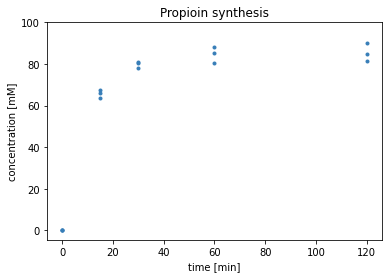

In [36]:
plt.figure()
ax = plt.subplot()
ax.plot(time_course_data, 'o', ms=3, color='#377eb8')
plt.title(reaction_name)
ax.set_xlabel('time [min]')
ax.set_ylabel('concentration [mM]')
ax.set_ylim(ymax = 100)
# save as svg
#plt.savefig('time-course.svg', bbox_inches='tight')
plt.show()

## Upload to DaRUS <a class="anchor" name="Upload"></a>
Finally, the EnzymeML document is published on DaRUS and written to your current directory.     
In order to publish a dataset to DaRUS you need an API Token.  
If you want to publish set the `publish` variable to `True`. Then you will be asked for your API Token.

In [ ]:
publish = False

In [37]:
if publish:
    API_Token = input('Enter API Token')

In [38]:
if publish:
    enzmlDoc.uploadToDataverse(
        baseURL="https://darus.uni-stuttgart.de/",
        API_Token= API_Token,
        dataverseName="enzymeml_at_work"
    )

Dataset with pid 'doi:10.18419/darus-2198' created.
